In [103]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import ttest_ind
from scipy.stats import stats


In [104]:

df_source_stg = pd.read_csv('veri.csv')
df_source = df_source_stg



In [105]:
# draft_round sütununun tamsayı formunu oluşturma
df_source = df_source.assign(\
	draft_round_int = df_source.draft_round\
		.apply(lambda x: int(x) if x != 'Undrafted' else np.nan)
	)

# seaborn ayarları
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set(font_scale = 1.4)

# genel sütun takma adları
column_aliases = \
	{
		'player_name':'Player Name',
		'count_seasons': '# of Seasons',
		'average_season':'Average Season Played',
		'draft_round_int':'Draft Round'
	}

# genel sütun sti̇lleri̇
format = {
	'Draft Round':'{:.0f}'
}

Text(1.3939999999999912, 0.5, 'NBA Sezonları')

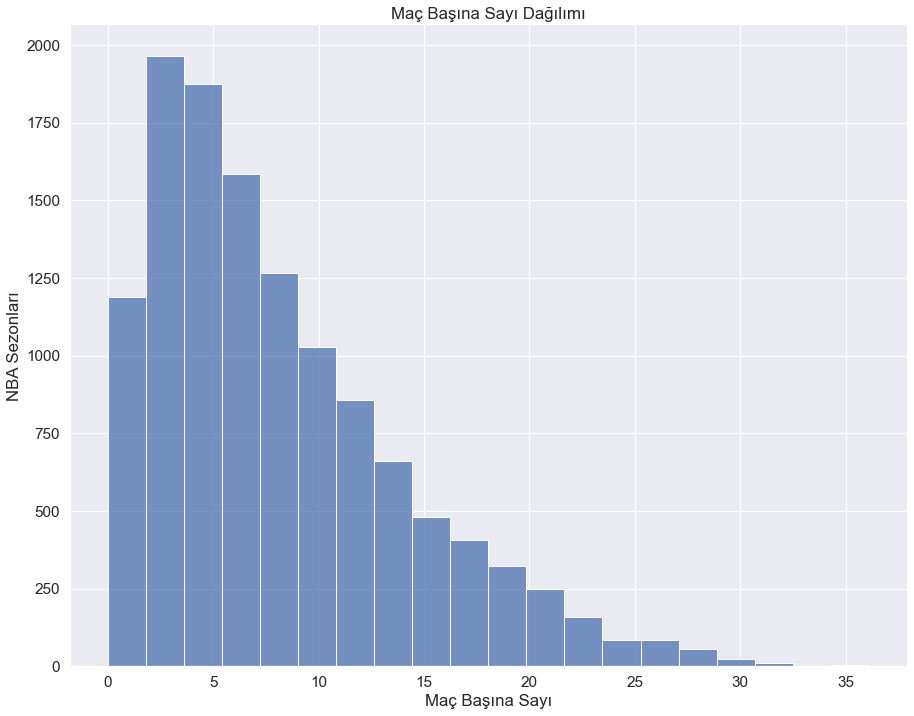

In [106]:
#Oyun Başına Puan Analizi
ax = sns.displot(df_source,x='pts', bins=20, height=10, aspect = 1.3)
plt.title('Maç Başına Sayı Dağılımı')
plt.xlabel('Maç Başına Sayı')
plt.ylabel('NBA Sezonları')

***Yukarıdaki dağılımdan, istisnai bir maç başına sayı ortalamasının ~25 veya üzerinde olduğu anlaşılmaktadır.***

In [107]:
series_quantile = df_source.quantile(np.arange(0,1,.01)).pts.sort_values(ascending=False)
df_quantile_pts = DataFrame(data={'percentile':series_quantile.index,'pts':series_quantile.values})
df_quantile_pts.head(10).rename(columns={'percentile':'Yüzdelik Dilim','pts':'Maç Başına Sayı'})

,Yüzdelik Dilim,Maç Başına Sayı
0,0.99,26.4
1,0.98,23.8
2,0.97,22.1
3,0.96,21.0
4,0.95,20.1
5,0.94,19.4
6,0.93,18.7
7,0.92,18.1
8,0.91,17.5
9,0.90,16.9


***Bu sonuçlar en üstteki %1'in 26,4 Maç Başına Sayı'dan büyük veya eşit olduğunu göstermektedir***

In [108]:
df_tmp = df_source[df_source.pts >= 26.4]\
	.assign(season_int=df_source.season.str.split('-').apply(lambda x:int(x[0])))\
	.groupby('player_name', as_index=False)\
	.agg(
		count_seasons=pd.NamedAgg('season','nunique')
		, average_season=pd.NamedAgg('season_int','mean')
	)

df_pts_top_1_pct = df_tmp\
	.assign(average_season=df_tmp.average_season.astype('int'))\
	.sort_values('count_seasons',ascending=False)\

df_pts_top_1_pct.head(10).rename(columns={'player_name':'Oyuncu Adı','average_season':'Oynanan Sezon','count_seasons':'Sezon Sayısı'})

,Oyuncu Adı,Sezon Sayısı,Oynanan Sezon
27,LeBron James,14,2011
25,Kobe Bryant,10,2006
0,Allen Iverson,9,2002
24,Kevin Durant,9,2014
17,James Harden,6,2016
3,Carmelo Anthony,5,2009
36,Shaquille O'Neal,5,1999
12,Giannis Antetokounmpo,5,2019
5,Damian Lillard,4,2018
37,Stephen Curry,4,2017


**Maç Başına Atılan Sayı'nın En İyi %1'inin en üstünü, buna uygun sezonlar açısından göstermektedir. Ortalama Oynanan Yıl, oyuncuların güncelliğinin bir ölçüsü olarak sonuçlara dahil edilmiştir.**

In [109]:
ppg_threshold = 26.4
df_tmp = df_source[(df_source.draft_round_int > 1) & (df_source.pts > ppg_threshold)]\
	.groupby(['player_name','draft_round_int'], as_index=False)\
	.agg(count_seasons=pd.NamedAgg('season','nunique'))\
	.sort_values('draft_round_int', ascending=False)

In [110]:
ppg_threshold = 16.9
df_source[(df_source.draft_round_int > 1) & (df_source.pts > ppg_threshold)]\
	.groupby(['player_name','draft_round_int'], as_index=False)\
	.agg(count_seasons=pd.NamedAgg('season','nunique'))\
	.sort_values('draft_round_int')\
	.head(10).rename(columns={'player_name':'Oyuncu Adı','draft_round_int':'Draft Sırası','count_seasons':'Sezon Sayısı'}).style.format(format)

,Oyuncu Adı,Draft Sırası,Sezon Sayısı
0,Bojan Bogdanovic,2.000000,4
31,Spencer Dinwiddie,2.000000,1
30,Rashard Lewis,2.000000,7
29,Paul Millsap,2.000000,4
28,Norman Powell,2.000000,2
27,Nikola Pekovic,2.000000,1
26,Nikola Jokic,2.000000,5
25,Nick Van Exel,2.000000,2
24,Montrezl Harrell,2.000000,1
23,Monta Ellis,2.000000,8


***Bu sonuç, 1.Turdan sonra seçilen ve bir veya daha fazla sezonda maç başına atılan sayılar'da ilk %1'de yer alan çok az oyuncu olduğunu gösteriyor.
2. Turdan sonra draft edilen en iyi oyuncular.***

*****Maç Başına Ribaund*****

Text(1.3939999999999912, 0.5, 'NBA Sezonları')

<Figure size 1080x720 with 0 Axes>

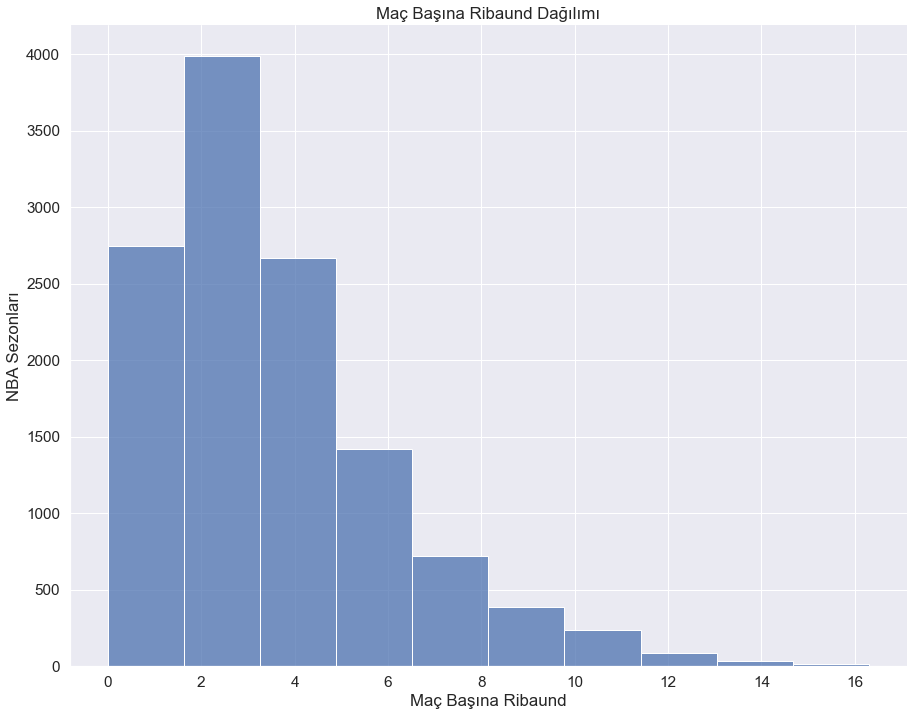

In [111]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.displot(df_source,x='reb', bins=10, height=10, aspect = 1.3)
plt.title('Maç Başına Ribaund Dağılımı')
plt.xlabel('Maç Başına Ribaund')
plt.ylabel('NBA Sezonları')

***Bu dağılım, iyi bir ribauntçunun maç başına 8 ya da daha fazla ribaunt aldığını göstermektedir.***

In [112]:
series_quantile = df_source.quantile(np.arange(0,1,.01)).reb.sort_values(ascending=False)
df_quantile_reb = DataFrame(data={'percentile':series_quantile.index,'reb':series_quantile.values})
df_quantile_reb.head(10).rename(columns={'percentile':'Yüzdelik Dilim','reb':'Maç Başına Ribaund'})

,Yüzdelik Dilim,Maç Başına Ribaund
0,0.99,11.600
1,0.98,10.400
2,0.97,9.700
3,0.96,9.100
4,0.95,8.600
5,0.94,8.200
6,0.93,7.872
7,0.92,7.500
8,0.91,7.300
9,0.90,7.000


**Aslında, oyuncuların en iyi %10'u maç başına 7 veya daha fazla ribaunt alırken, oyuncuların en iyi %1'i 11.6 veya daha fazla ribaunt almaktadır**

In [113]:
df_tmp = df_source[df_source.reb >= 11.6]\
	.assign(season_int=df_source.season.str.split('-').apply(lambda x:int(x[0])))\
	.groupby('player_name', as_index=False)\
	.agg(
		count_seasons=pd.NamedAgg('season','nunique')
		, average_season=pd.NamedAgg('season_int','mean')
	)

df_reb_top_1_pct = df_tmp\
	.assign(average_season=df_tmp.average_season.astype('int'))\
	.sort_values('count_seasons',ascending=False)\

df_tmp.head(10).rename(columns={'player_name':'Oyuncu Adı','average_season':'Oynanan Sezon','count_seasons':'Sezon Sayısı'})

,Oyuncu Adı,Sezon Sayısı,Oynanan Sezon
0,Anderson Varejao,1,2012.0
1,Andre Drummond,8,2016.5
2,Andrew Bynum,1,2011.0
3,Anthony Davis,2,2017.0
4,Antonio McDyess,1,2000.0
5,Ben Wallace,5,2002.0
6,Blake Griffin,1,2010.0
7,Carlos Boozer,1,2006.0
8,Charles Barkley,3,1997.0
9,Chris Kaman,1,2007.0


**En İyi %1'in üst sırasını ve oyuncunun Oynadığı Sezonu bir sıklık ölçüsü olarak sunar**

**Maç Başına Asist**

Text(1.3939999999999912, 0.5, 'NBA Sezonları')

<Figure size 1080x720 with 0 Axes>

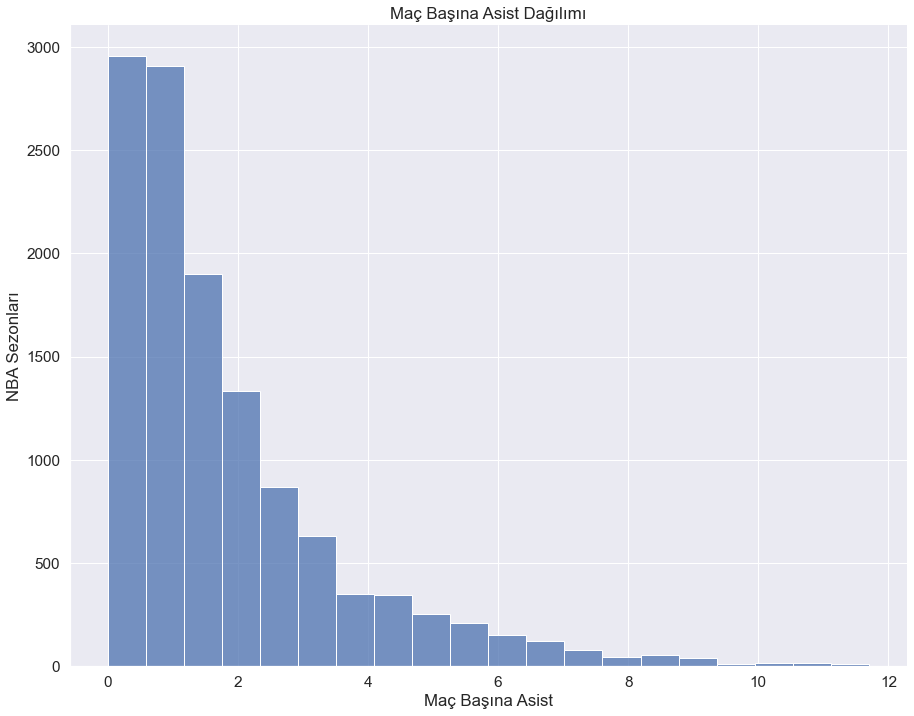

In [114]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.displot(df_source,x='ast', bins=20, height=10, aspect = 1.3)
plt.title('Maç Başına Asist Dağılımı')
plt.xlabel('Maç Başına Asist')
plt.ylabel('NBA Sezonları')

***Bu Sonuçta dikkat çeken şey, Maç Başına sayı ve Ribaund dağılımlarına kıyasla en büyük kutucukların sıfıra daha yakın olmasıdır. Bu, Maç başına 0 sayı veya 0 Ribaund yapan oyunculardan daha fazla oyuncunun 0 asist yaptığını göstermektedir.***

In [115]:
series_quantile = df_source.quantile(np.arange(0,1,.01)).ast.sort_values(ascending=False)
df_quantile_ast = DataFrame(data={'percentile':series_quantile.index,'ast':series_quantile.values})
df_quantile_ast.head(10).rename(columns={'percentile':'Yüzdelik Dilim','ast':'Maç Başına Asist'})

,Yüzdelik Dilim,Maç Başına Asist
0,0.99,8.4
1,0.98,7.3
2,0.97,6.6
3,0.96,6.0
4,0.95,5.6
5,0.94,5.3
6,0.93,5.0
7,0.92,4.7
8,0.91,4.4
9,0.90,4.2


In [116]:
df_tmp = df_source[df_source.ast >= 8.4]\
	.assign(season_int=df_source.season.str.split('-').apply(lambda x:int(x[0])))\
	.groupby('player_name', as_index=False)\
	.agg(
		count_seasons=pd.NamedAgg('season','nunique')
		, average_season=pd.NamedAgg('season_int','mean')
	)

df_ast_top_1_pct = df_tmp\
	.assign(average_season=df_tmp.average_season.astype('int'))\
	.sort_values('count_seasons',ascending=False)\

df_ast_top_1_pct.head(10).rename(columns={'player_name':'Oyuncu Adı','average_season':'Oynanan Sezon','count_seasons':'Sezon Sayısı'})

,Oyuncu Adı,Sezon Sayısı,Oynanan Sezon
15,Jason Kidd,13,2002
4,Chris Paul,13,2012
35,Steve Nash,9,2007
31,Russell Westbrook,6,2016
8,Deron Williams,6,2008
17,John Wall,6,2015
27,Rajon Rondo,6,2011
28,Ricky Rubio,5,2015
22,LeBron James,4,2015
34,Stephon Marbury,4,1999


**Asist Yapanların en iyi %1'i**